In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25595 sha256=99f4fef34e29dc96dc205712ed4825bf2972216e720b66656da36c2bc455f38b
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

df= pd.read_csv('/content/drive/Shareddrives/시뮬레이션 팀플/충전 data.csv')
df

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,서울,마포용산,용산역 아이파크몰,완속05,735,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,10.76,1,41,2022.1.1,2022.1.1 20:41,2022.1.1 22:23
1,서울,마포용산,용산역 아이파크몰,완속05,735,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,5.63,0,49,2022.1.1,2022.1.1 19:40,2022.1.1 20:30
2,서울,마포용산,용산역 아이파크몰,완속07,737,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,8.45,1,19,2022.1.1,2022.1.1 18:35,2022.1.1 19:55
3,서울,마포용산,용산역 아이파크몰,급속06,725,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,2.30,0,14,2022.1.1,2022.1.1 19:23,2022.1.1 19:37
4,서울,마포용산,용산역 아이파크몰,급속09,728,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,44.94,0,53,2022.1.1,2022.1.1 21:09,2022.1.1 22:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,서울,마포용산,용산역 아이파크몰,완속08,738,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,12.47,3,45,2022.3.30,2022.3.30 8:34,2022.3.30 12:20
3517,서울,마포용산,용산역 아이파크몰,완속09,739,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,9.57,1,37,2022.3.30,2022.3.30 9:37,2022.3.30 11:15
3518,서울,마포용산,용산역 아이파크몰,완속05,735,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,14.05,5,2,2022.3.30,2022.3.30 7:52,2022.3.30 12:55
3519,서울,마포용산,용산역 아이파크몰,급속06,725,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,6.55,0,21,2022.3.30,2022.3.30 18:55,2022.3.30 19:17


In [ ]:
df['time'] = df['충전시간'] *60 + df['충전분']

In [ ]:
slow= df[df['충전기구분']=='완속']
fast= df[df['충전기구분']=='급속']

In [ ]:
slow[slow['time']==0]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,time
534,서울,마포용산,용산역 아이파크몰,완속11,731,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,0.06,0,0,2022.1.13,2022.1.13 11:20,2022.1.13 11:20,0
535,서울,마포용산,용산역 아이파크몰,완속06,736,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,0.07,0,0,2022.1.13,2022.1.13 11:23,2022.1.13 11:24,0
537,서울,마포용산,용산역 아이파크몰,완속07,737,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,0.05,0,0,2022.1.13,2022.1.13 11:24,2022.1.13 11:24,0
564,서울,마포용산,용산역 아이파크몰,완속03,733,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,0.03,0,0,2022.1.14,2022.1.14 18:48,2022.1.14 18:48,0
833,서울,마포용산,용산역 아이파크몰,완속07,737,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,0.08,0,0,2022.1.20,2022.1.20 14:49,2022.1.20 14:50,0
1478,서울,마포용산,용산역 아이파크몰,완속06,736,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,0.06,0,0,2022.2.5,2022.2.5 12:47,2022.2.5 12:48,0
1612,서울,마포용산,용산역 아이파크몰,완속01,729,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,0.03,0,0,2022.2.8,2022.2.8 15:14,2022.2.8 15:15,0
1867,서울,마포용산,용산역 아이파크몰,완속06,736,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,0.03,0,0,2022.2.14,2022.2.14 15:33,2022.2.14 15:33,0
1907,서울,마포용산,용산역 아이파크몰,완속04,734,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,0.07,0,0,2022.2.15,2022.2.15 15:57,2022.2.15 15:58,0
1922,서울,마포용산,용산역 아이파크몰,완속02,732,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",완속,7,0.08,0,0,2022.2.15,2022.2.15 14:38,2022.2.15 14:39,0


In [ ]:
fast[fast['time']==0]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,time
53,서울,마포용산,용산역 아이파크몰,급속10,720,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,0.02,0,0,2022.1.1,2022.1.1 12:31,2022.1.1 12:31,0
69,서울,마포용산,용산역 아이파크몰,급속02,721,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,0.63,0,0,2022.1.2,2022.1.2 20:03,2022.1.2 20:04,0
519,서울,마포용산,용산역 아이파크몰,급속09,728,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,0.18,0,0,2022.1.13,2022.1.13 11:39,2022.1.13 11:40,0
538,서울,마포용산,용산역 아이파크몰,급속06,725,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,0.27,0,0,2022.1.13,2022.1.13 11:47,2022.1.13 11:48,0
549,서울,마포용산,용산역 아이파크몰,급속08,727,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,0.29,0,0,2022.1.13,2022.1.13 11:40,2022.1.13 11:41,0
605,서울,마포용산,용산역 아이파크몰,급속02,721,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,0.29,0,0,2022.1.14,2022.1.14 14:50,2022.1.14 14:51,0
617,서울,마포용산,용산역 아이파크몰,급속03,722,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,0.46,0,0,2022.1.15,2022.1.15 21:21,2022.1.15 21:22,0
705,서울,마포용산,용산역 아이파크몰,급속03,722,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,0.07,0,0,2022.1.16,2022.1.16 2:43,2022.1.16 2:44,0
1068,서울,마포용산,용산역 아이파크몰,급속05,724,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,0.49,0,0,2022.1.25,2022.1.25 13:05,2022.1.25 13:06,0
1624,서울,마포용산,용산역 아이파크몰,급속03,722,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50,0.22,0,0,2022.2.8,2022.2.8 14:09,2022.2.8 14:10,0


In [ ]:
slow= slow[slow.time != 0]
fast= fast[fast.time != 0]

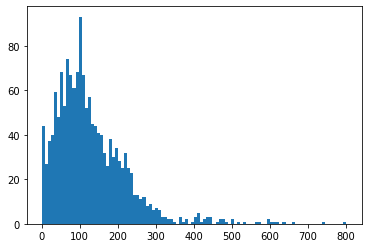

In [ ]:
import matplotlib.pyplot as plt

p=plt.hist(slow['time'],bins=100)

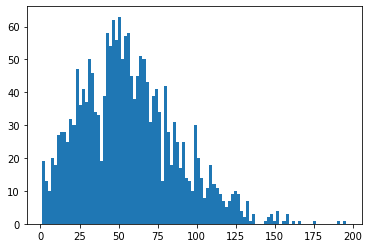

In [ ]:
p=plt.hist(fast['time'],bins=100)

In [ ]:
slow_time = slow['time'].values

In [ ]:
fast_time=fast['time'].values

Fitting 5 distributions: 100%|██████████| 5/5 [00:49<00:00,  9.92s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.000021,1.867407e+03,-2.743111e+04,inf,0.029995,1.273825e-01
norm,0.000062,2.475893e+03,-2.581841e+04,inf,0.106770,1.559982e-15
gamma,0.000635,4.081688e+04,-2.228849e+04,inf,0.970038,0.000000e+00
lognorm,0.000663,1.742223e+03,-2.222336e+04,inf,0.613243,0.000000e+00
burr,inf,inf,inf,inf,NaN,NaN


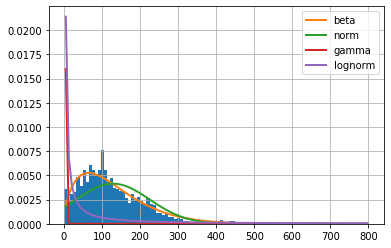

In [ ]:
f = Fitter(slow_time,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 2.9509866399152527,
  'b': 9.6203737462526,
  'loc': -6.5650265789886815,
  'scale': 270.435655335943}}

Fitting 5 distributions: 100%|██████████| 5/5 [00:45<00:00,  9.19s/it]


{'beta': {'a': 2.9509866399152527,
  'b': 9.6203737462526,
  'loc': -6.5650265789886815,
  'scale': 270.435655335943}}

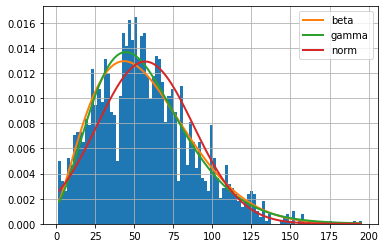

In [ ]:
f = Fitter(fast_time,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [ ]:
f.fitted_param["beta"]